In [12]:
path = "/Users/Merlin/Downloads/Datasets/capstone_df.csv"

pip install nltk --upgrade

In [13]:
import pandas as pd

In [27]:
df = pd.read_csv(path, index_col=0)

In [29]:
df.columns

Index(['question', 'answer', 'saved'], dtype='object')

df

In [28]:
df.drop(['choices', 'saved.question','saved.answer', 'line', 'showContext', 'type',
       'heading_name', 'saved.choices',
       'saved.showContext', 'saved.heading_name', 'saved.type',
       'book_id','chapters.chapter_name',
       'chapters.chapter_content', 'chapters.keyphrase_saved_Question_count',
       'chapters.example_question_saved_count',
       'chapters.keyphrase_question_nonsaved_count',
       'chapters.example_nonsaved_count','book_name'], axis = 1, inplace = True)

In [26]:
#df.rename(columns = {'ai_generated':'ai_generated_question', 'saved.question':'edited_saved_question', 'saved.answer':'saved_answer'}, inplace = True)

In [30]:
df['question'] = df['question'].apply(lambda x: str(x).replace('_', '<ANSWER>',1).replace('_', ''))


In [31]:
## replace <ANSWER> with actual answer
df["question"]= df.apply(lambda x: x['question'].replace('<ANSWER>', str(x['answer'])), axis=1)

In [32]:
df

,question,answer,saved
0,Net income under Variable Costing is unaffec...,Variable Costing,True
1,A Voucher is an authorization form prepared ...,Voucher,True
2,"In contrast, under Variable Costing , all fix...",Variable Costing,True
3,It is an earnings amount calculated as net inc...,Stock,True
4,"For example, Nike golf clubs are sold at local...",What's Cooking?,True
...,...,...,...
16674,This diagram of a typical parasitic flatworm s...,Gut,False
16675,"As you will see, an important property for Li...",Lipids,False
16676,"Humans have only carotid bodies, which are fou...",Arteries,False
16677,The Ciliates are much more complex in body f...,Ciliates,False


## POS tagging

In [33]:
from nltk import word_tokenize, pos_tag, pos_tag_sents

In [34]:
tags = pos_tag_sents (map(word_tokenize, df['question'].tolist()))

In [35]:
tag_only = [[item[1] for item in question] for question in tags]

In [36]:
df['tag_only'] = tag_only

In [40]:
df

,question,answer,saved,tag_only
0,Net income under Variable Costing is unaffec...,Variable Costing,True,"[JJ, NN, IN, JJ, NNP, VBZ, VBN, IN, NNS, IN, N..."
1,A Voucher is an authorization form prepared ...,Voucher,True,"[DT, NNP, VBZ, DT, NN, NN, VBN, IN, DT, NN, .]"
2,"In contrast, under Variable Costing , all fix...",Variable Costing,True,"[IN, NN, ,, IN, JJ, NNP, ,, DT, JJ, NN, NNS, V..."
3,It is an earnings amount calculated as net inc...,Stock,True,"[PRP, VBZ, DT, NNS, NN, VBD, IN, JJ, NN, JJR, ..."
4,"For example, Nike golf clubs are sold at local...",What's Cooking?,True,"[IN, NN, ,, NNP, NN, NNS, VBP, VBN, IN, JJ, NN..."
...,...,...,...,...
16674,This diagram of a typical parasitic flatworm s...,Gut,False,"[DT, NN, IN, DT, JJ, JJ, NN, VBZ, DT, JJ, NNS,..."
16675,"As you will see, an important property for Li...",Lipids,False,"[IN, PRP, MD, VB, ,, DT, JJ, NN, IN, NNP, IN, ..."
16676,"Humans have only carotid bodies, which are fou...",Arteries,False,"[NNS, VBP, RB, JJ, NNS, ,, WDT, VBP, VBN, IN, ..."
16677,The Ciliates are much more complex in body f...,Ciliates,False,"[DT, NNPS, VBP, RB, RBR, JJ, IN, NN, NN, IN, V..."


In [41]:
#two dfs
condition = df.saved == True

In [43]:
df_saved = df[condition]
df_unsaved = df[~condition]

In [47]:
#flatten list of list
flatten_saved_tagsOnly = []
for item in df_saved.tag_only:
    for tags in item:
        flatten_saved_tagsOnly.append(tags)

In [49]:
#flatten list of list
flatten_unsaved_tagsOnly = []
for item in df_unsaved.tag_only:
    for tags in item:
        flatten_unsaved_tagsOnly.append(tags)

In [50]:
new_df = pd.DataFrame({'unsaved_tags': pd.Series(flatten_unsaved_tagsOnly), 'saved_tags': pd.Series(flatten_saved_tagsOnly)})

In [65]:
new_df.dropna(inplace = True)

In [66]:
new_df_melt = pd.melt(new_df)

In [67]:
new_df_melt

,variable,value
0,unsaved_tags,NNP
1,unsaved_tags,NNP
2,unsaved_tags,$
3,unsaved_tags,CD
4,unsaved_tags,NNP
...,...,...
98019,saved_tags,:
98020,saved_tags,.
98021,saved_tags,FW
98022,saved_tags,CD


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

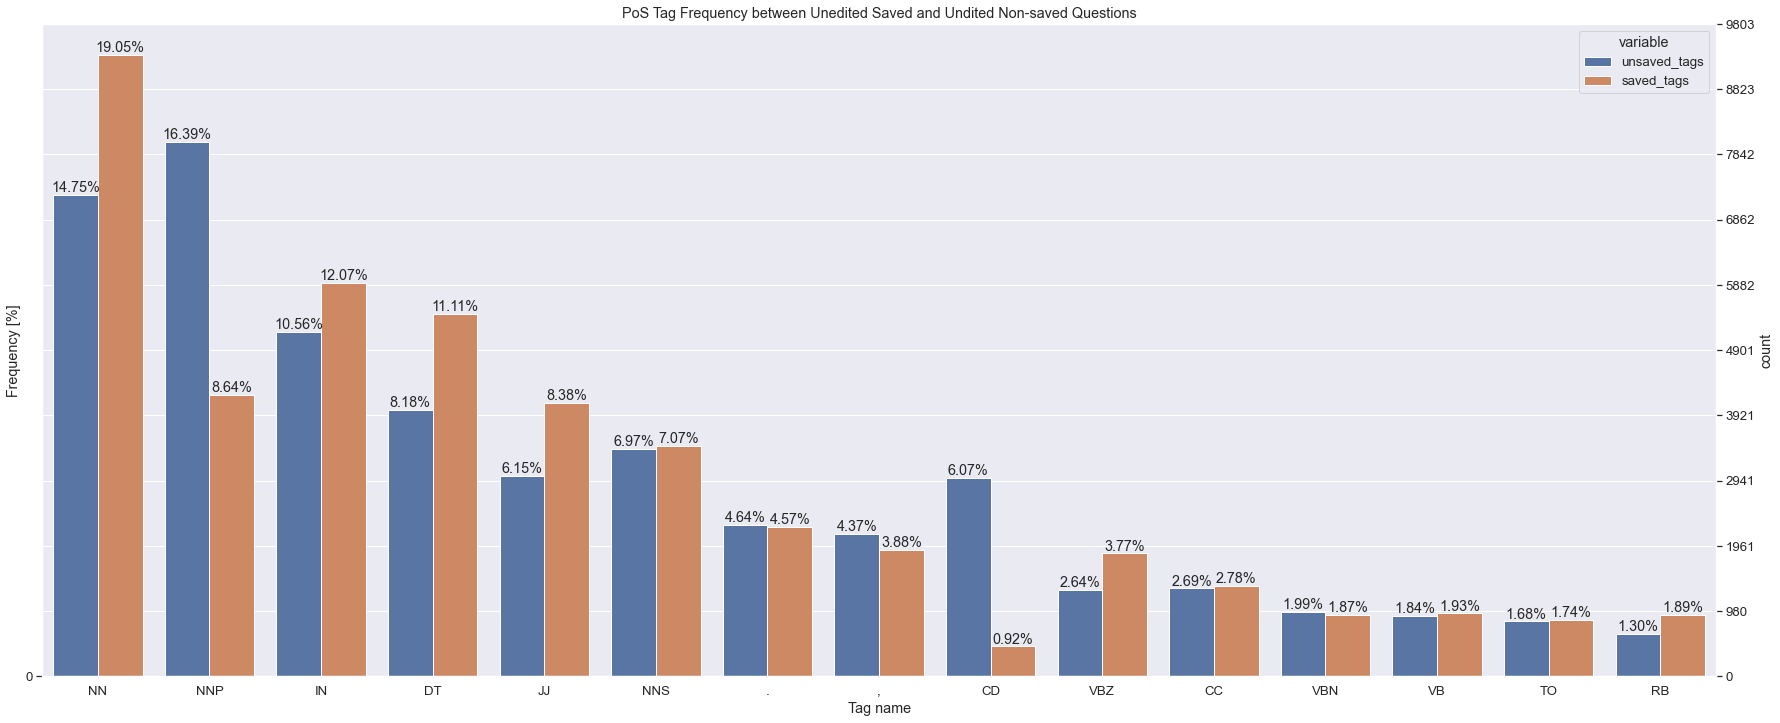

In [69]:
plt.figure(figsize=(30,12))
sns.set(font_scale = 1.2)

ax = sns.countplot(x="value", data=new_df_melt, hue = 'variable', 
                   order=new_df_melt.value.value_counts().iloc[:15].index)
plt.title('PoS Tag Frequency between Unedited Saved and Undited Non-saved Questions')
plt.xlabel('Tag name')

ncount = len(new_df)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# # Fix the frequency range to 0-100
# ax2.set_ylim(0,100)
# ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

In [70]:
import spacy
from spacy import displacy
ner = spacy.load("en_core_web_sm")

In [71]:
df

,question,answer,saved,tag_only
0,Net income under Variable Costing is unaffec...,Variable Costing,True,"[JJ, NN, IN, JJ, NNP, VBZ, VBN, IN, NNS, IN, N..."
1,A Voucher is an authorization form prepared ...,Voucher,True,"[DT, NNP, VBZ, DT, NN, NN, VBN, IN, DT, NN, .]"
2,"In contrast, under Variable Costing , all fix...",Variable Costing,True,"[IN, NN, ,, IN, JJ, NNP, ,, DT, JJ, NN, NNS, V..."
3,It is an earnings amount calculated as net inc...,Stock,True,"[PRP, VBZ, DT, NNS, NN, VBD, IN, JJ, NN, JJR, ..."
4,"For example, Nike golf clubs are sold at local...",What's Cooking?,True,"[IN, NN, ,, NNP, NN, NNS, VBP, VBN, IN, JJ, NN..."
...,...,...,...,...
16674,This diagram of a typical parasitic flatworm s...,Gut,False,"[DT, NN, IN, DT, JJ, JJ, NN, VBZ, DT, JJ, NNS,..."
16675,"As you will see, an important property for Li...",Lipids,False,"[IN, PRP, MD, VB, ,, DT, JJ, NN, IN, NNP, IN, ..."
16676,"Humans have only carotid bodies, which are fou...",Arteries,False,"[NNS, VBP, RB, JJ, NNS, ,, WDT, VBP, VBN, IN, ..."
16677,The Ciliates are much more complex in body f...,Ciliates,False,"[DT, NNPS, VBP, RB, RBR, JJ, IN, NN, NN, IN, V..."


In [72]:
questions = df['question'].tolist()
ner_labels = []
for question in questions:
    ner_ai_question = ner(question)
    label_list = []
    for word in ner_ai_question.ents:
        label_list.append(word.label_)
    ner_labels.append(label_list)

In [73]:
ner_labels

[['WORK_OF_ART'],
 [],
 ['WORK_OF_ART'],
 [],
 ['ORG'],
 ['MONEY', 'ORG', 'MONEY', 'MONEY'],
 [],
 ['ORG'],
 [],
 [],
 [],
 ['ORDINAL'],
 ['ORG'],
 ['CARDINAL', 'CARDINAL'],
 ['ORG'],
 [],
 ['ORG'],
 ['LOC'],
 ['LAW', 'CARDINAL'],
 ['DATE'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['ORG', 'ORG', 'ORG'],
 [],
 [],
 ['DATE'],
 ['ORDINAL'],
 [],
 ['ORDINAL'],
 [],
 ['ORG'],
 [],
 [],
 [],
 [],
 [],
 ['ORG'],
 [],
 ['DATE'],
 [],
 ['ORDINAL'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['PERSON', 'PERCENT', 'PERCENT'],
 [],
 [],
 [],
 [],
 [],
 ['ORG', 'DATE', 'DATE', 'DATE'],
 [],
 [],
 [],
 [],
 ['CARDINAL'],
 ['WORK_OF_ART'],
 ['ORG'],
 [],
 [],
 [],
 [],
 ['ORG'],
 [],
 ['PERSON'],
 ['MONEY'],
 ['PERSON', 'PERCENT', 'PERCENT'],
 [],
 [],
 ['ORG'],
 ['ORG'],
 [],
 [],
 [],
 ['MONEY', 'MONEY', 'MONEY', 'WORK_OF_ART'],
 [],
 ['ORG'],
 [],
 [],
 [],
 [],
 [],
 ['ORG'],
 [],
 ['ORG'],
 ['ORG', 'ORDINAL', 'ORDINAL'],
 [],
 ['PERSON'],
 ['ORG', 'FAC'],
 [],
 ['PERCENT'],
 [],
 [],
 [],
 ['ORG'

In [74]:
df['NER_tags'] = ner_labels

In [75]:
df

,question,answer,saved,tag_only,NER_tags
0,Net income under Variable Costing is unaffec...,Variable Costing,True,"[JJ, NN, IN, JJ, NNP, VBZ, VBN, IN, NNS, IN, N...",[WORK_OF_ART]
1,A Voucher is an authorization form prepared ...,Voucher,True,"[DT, NNP, VBZ, DT, NN, NN, VBN, IN, DT, NN, .]",[]
2,"In contrast, under Variable Costing , all fix...",Variable Costing,True,"[IN, NN, ,, IN, JJ, NNP, ,, DT, JJ, NN, NNS, V...",[WORK_OF_ART]
3,It is an earnings amount calculated as net inc...,Stock,True,"[PRP, VBZ, DT, NNS, NN, VBD, IN, JJ, NN, JJR, ...",[]
4,"For example, Nike golf clubs are sold at local...",What's Cooking?,True,"[IN, NN, ,, NNP, NN, NNS, VBP, VBN, IN, JJ, NN...",[ORG]
...,...,...,...,...,...
16674,This diagram of a typical parasitic flatworm s...,Gut,False,"[DT, NN, IN, DT, JJ, JJ, NN, VBZ, DT, JJ, NNS,...",[]
16675,"As you will see, an important property for Li...",Lipids,False,"[IN, PRP, MD, VB, ,, DT, JJ, NN, IN, NNP, IN, ...",[]
16676,"Humans have only carotid bodies, which are fou...",Arteries,False,"[NNS, VBP, RB, JJ, NNS, ,, WDT, VBP, VBN, IN, ...",[]
16677,The Ciliates are much more complex in body f...,Ciliates,False,"[DT, NNPS, VBP, RB, RBR, JJ, IN, NN, NN, IN, V...",[]


In [76]:
df_saved_ner = df[condition]
df_unsaved_ner = df[~condition]

In [77]:
#flatten list of list
flatten_saved_nertagsOnly = []
for item in df_saved_ner.NER_tags:
    for tags in item:
        flatten_saved_nertagsOnly.append(tags)

In [78]:
#flatten list of list
flatten_unsaved_nertagsOnly = []
for item in df_unsaved_ner.NER_tags:
    for tags in item:
        flatten_unsaved_nertagsOnly.append(tags)

In [79]:
ner_df = pd.DataFrame({'unsaved_nertags': pd.Series(flatten_unsaved_nertagsOnly), 'saved_nertags': pd.Series(flatten_saved_nertagsOnly)})

In [87]:
ner_df

,unsaved_nertags,saved_nertags
0,MONEY,WORK_OF_ART
1,MONEY,WORK_OF_ART
2,CARDINAL,ORG
3,PRODUCT,MONEY
4,CARDINAL,ORG
...,...,...
1108,ORG,ORG
1109,MONEY,CARDINAL
1110,DATE,FAC
1111,CARDINAL,DATE


In [86]:
ner_df.dropna(inplace = True)

In [88]:
ner_df_melt = pd.melt(ner_df)

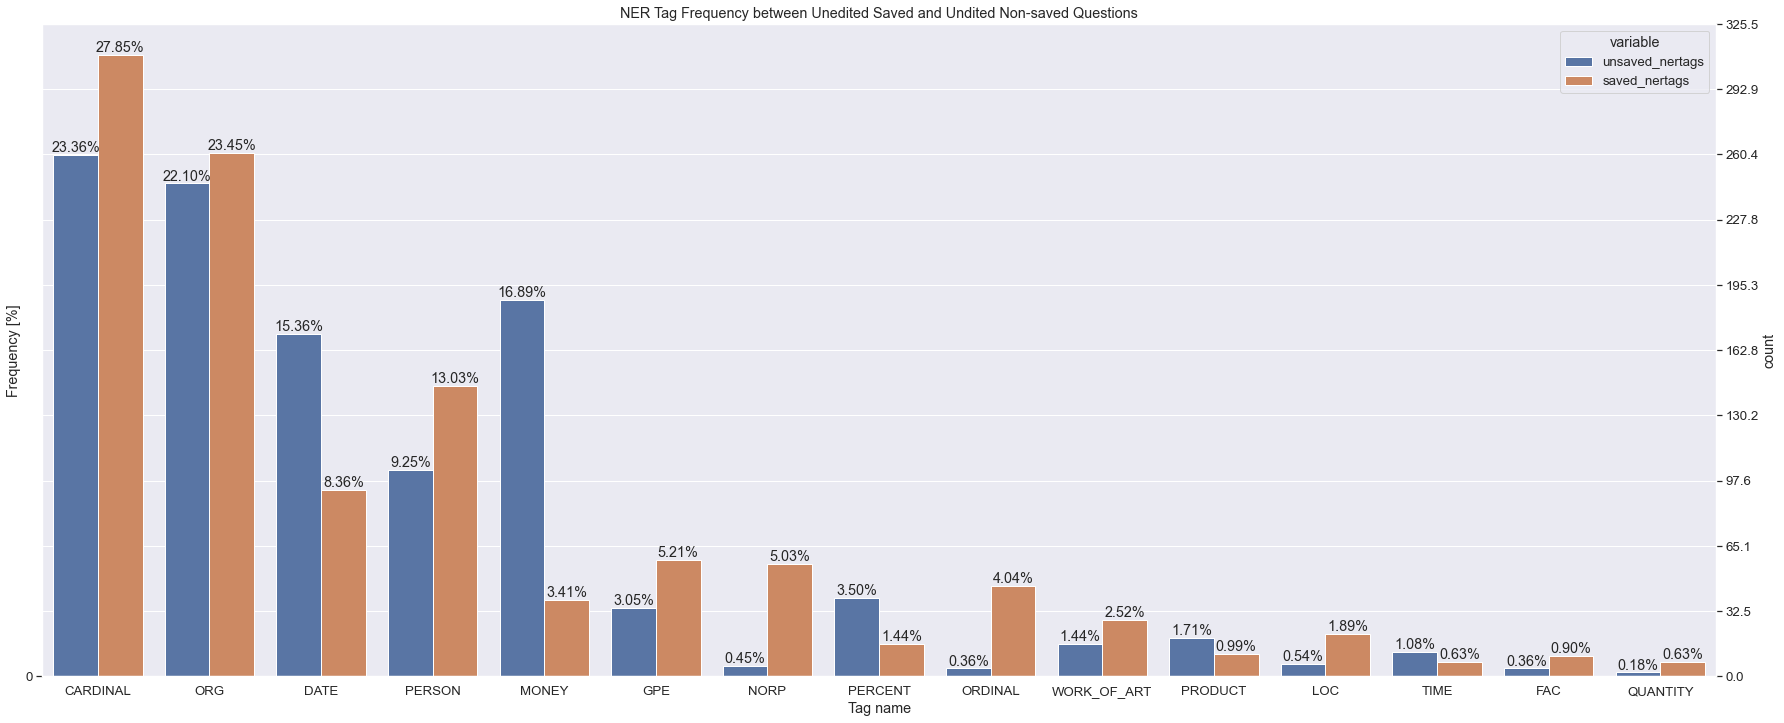

In [89]:
plt.figure(figsize=(30,12))
sns.set(font_scale = 1.2)

ax = sns.countplot(x="value", data=ner_df_melt, hue = 'variable', 
                   order=ner_df_melt.value.value_counts().iloc[:15].index)
plt.title('NER Tag Frequency between Unedited Saved and Undited Non-saved Questions')
plt.xlabel('Tag name')

ncount = len(ner_df)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# # Fix the frequency range to 0-100
# ax2.set_ylim(0,100)
# ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)